In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/content/drive/MyDrive/Data Science Projects/Time Series Analysis Bajaj Finance/BAJFINANCE.csv'

In [3]:
df = pd.read_csv(path)
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.50,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.90,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.60,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.10,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.00,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
5066,2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
5067,2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840
5068,2020-08-28,BAJFINANCE,EQ,3632.50,3650.00,3688.00,3617.05,3672.05,3670.80,3652.77,4251575,1.553003e+15,137033.0,434147.0,0.1021


In [4]:
df.set_index('Date', inplace=True)

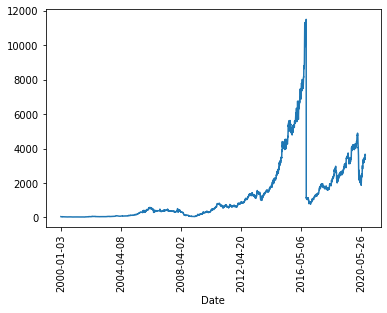

In [5]:
df['VWAP'].plot()
plt.xticks(rotation='vertical')
plt.show()

In [6]:
df.dropna(inplace=True)

In [7]:
data = df.copy()

In [8]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [9]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [10]:
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']
window_1 =3
window_2 = 7

In [11]:
for feature in lag_features:
  data[feature+'_rollingMean_3'] = data[feature].rolling(window=window_1).mean()
  data[feature+'_rollingMean_7'] = data[feature].rolling(window=window_2).mean()

In [12]:
for feature in lag_features:
  data[feature+'_rollingStd_3'] = data[feature].rolling(window=window_1).std()
  data[feature+'_rollingStd_7'] = data[feature].rolling(window=window_2).std()

In [13]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High_rollingStd_3,High_rollingStd_7,Low_rollingStd_3,Low_rollingStd_7,Volume_rollingStd_3,Volume_rollingStd_7,Turnover_rollingStd_3,Turnover_rollingStd_7,Trades_rollingStd_3,Trades_rollingStd_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,2.698087e+04,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,2.735270e+04,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,2.639122e+04,NaN,1.652377e+12,NaN,78.270897,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,...,111.840660,89.327396,69.777271,61.471880,3.613401e+06,2.348888e+06,1.315344e+15,8.608028e+14,125273.490429,81831.863468
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,...,100.081633,116.819954,115.027609,100.638138,1.987080e+06,2.403611e+06,7.237865e+14,8.886997e+14,74234.798338,82982.637290
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,...,25.064982,122.216500,62.320569,111.614377,2.641848e+06,2.408580e+06,9.306171e+14,8.850381e+14,91269.616085,82597.470913


In [14]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
High_rollingMean_3        2
High_rollingMean_7        6
Low_rollingMean_3         2
Low_rollingMean_7         6
Volume_rollingMean_3      2
Volume_rollingMean_7      6
Turnover_rollingMean_3    2
Turnover_rollingMean_7    6
Trades_rollingMean_3      2
Trades_rollingMean_7      6
High_rollingStd_3         2
High_rollingStd_7         6
Low_rollingStd_3          2
Low_rollingStd_7          6
Volume_rollingStd_3       2
Volume_rollingStd_7       6
Turnover_rollingStd_3     2
Turnover_rollingStd_7     6
Trades_rollingStd_3       2
Trades_rollingStd_7       6
dtype: int64

In [15]:
data.dropna(inplace=True)

In [16]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rollingMean_3', 'High_rollingMean_7',
       'Low_rollingMean_3', 'Low_rollingMean_7', 'Volume_rollingMean_3',
       'Volume_rollingMean_7', 'Turnover_rollingMean_3',
       'Turnover_rollingMean_7', 'Trades_rollingMean_3',
       'Trades_rollingMean_7', 'High_rollingStd_3', 'High_rollingStd_7',
       'Low_rollingStd_3', 'Low_rollingStd_7', 'Volume_rollingStd_3',
       'Volume_rollingStd_7', 'Turnover_rollingStd_3', 'Turnover_rollingStd_7',
       'Trades_rollingStd_3', 'Trades_rollingStd_7'],
      dtype='object')

In [17]:
data.shape

(2285, 34)

In [18]:
ind_features = ['High_rollingMean_3', 'High_rollingMean_7',
       'Low_rollingMean_3', 'Low_rollingMean_7', 'Volume_rollingMean_3',
       'Volume_rollingMean_7', 'Turnover_rollingMean_3',
       'Turnover_rollingMean_7', 'Trades_rollingMean_3',
       'Trades_rollingMean_7', 'High_rollingStd_3', 'High_rollingStd_7',
       'Low_rollingStd_3', 'Low_rollingStd_7', 'Volume_rollingStd_3',
       'Volume_rollingStd_7', 'Turnover_rollingStd_3', 'Turnover_rollingStd_7',
       'Trades_rollingStd_3', 'Trades_rollingStd_7']

In [19]:
df_train = data[0:1800].copy()
df_test = data[1800:].copy()

In [20]:
df_train.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rollingMean_3', 'High_rollingMean_7',
       'Low_rollingMean_3', 'Low_rollingMean_7', 'Volume_rollingMean_3',
       'Volume_rollingMean_7', 'Turnover_rollingMean_3',
       'Turnover_rollingMean_7', 'Trades_rollingMean_3',
       'Trades_rollingMean_7', 'High_rollingStd_3', 'High_rollingStd_7',
       'Low_rollingStd_3', 'Low_rollingStd_7', 'Volume_rollingStd_3',
       'Volume_rollingStd_7', 'Turnover_rollingStd_3', 'Turnover_rollingStd_7',
       'Trades_rollingStd_3', 'Trades_rollingStd_7'],
      dtype='object')

In [21]:
df_train.shape

(1800, 34)

In [22]:
df_train.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
High_rollingMean_3        0
High_rollingMean_7        0
Low_rollingMean_3         0
Low_rollingMean_7         0
Volume_rollingMean_3      0
Volume_rollingMean_7      0
Turnover_rollingMean_3    0
Turnover_rollingMean_7    0
Trades_rollingMean_3      0
Trades_rollingMean_7      0
High_rollingStd_3         0
High_rollingStd_7         0
Low_rollingStd_3          0
Low_rollingStd_7          0
Volume_rollingStd_3       0
Volume_rollingStd_7       0
Turnover_rollingStd_3     0
Turnover_rollingStd_7     0
Trades_rollingStd_3       0
Trades_rollingStd_7       0
dtype: int64

In [23]:
df_test.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rollingMean_3', 'High_rollingMean_7',
       'Low_rollingMean_3', 'Low_rollingMean_7', 'Volume_rollingMean_3',
       'Volume_rollingMean_7', 'Turnover_rollingMean_3',
       'Turnover_rollingMean_7', 'Trades_rollingMean_3',
       'Trades_rollingMean_7', 'High_rollingStd_3', 'High_rollingStd_7',
       'Low_rollingStd_3', 'Low_rollingStd_7', 'Volume_rollingStd_3',
       'Volume_rollingStd_7', 'Turnover_rollingStd_3', 'Turnover_rollingStd_7',
       'Trades_rollingStd_3', 'Trades_rollingStd_7'],
      dtype='object')

In [24]:
df_test.shape

(485, 34)

In [25]:
df_test.isnull().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
High_rollingMean_3        0
High_rollingMean_7        0
Low_rollingMean_3         0
Low_rollingMean_7         0
Volume_rollingMean_3      0
Volume_rollingMean_7      0
Turnover_rollingMean_3    0
Turnover_rollingMean_7    0
Trades_rollingMean_3      0
Trades_rollingMean_7      0
High_rollingStd_3         0
High_rollingStd_7         0
Low_rollingStd_3          0
Low_rollingStd_7          0
Volume_rollingStd_3       0
Volume_rollingStd_7       0
Turnover_rollingStd_3     0
Turnover_rollingStd_7     0
Trades_rollingStd_3       0
Trades_rollingStd_7       0
dtype: int64

In [26]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.5 MB/s eta 0:00:00


In [27]:
from pmdarima import auto_arima

In [28]:
model = auto_arima(y= df_train['VWAP'], exogenous= df_train[ind_features], trace= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25013.840, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25015.795, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25015.799, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25011.876, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.66 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 8.006 seconds


In [29]:
model.fit(df_train['VWAP'], df_train[ind_features])

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [30]:
forecast = model.predict(n_periods=len(df_test), X = df_test[ind_features])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
#import statsmodels.api as sm

# Ajustar el modelo ARIMA con variables exógenas
#rima_model = sm.tsa.ARIMA(df_train['VWAP'], exog=df_train[ind_features], order=(0, 1, 0))

# Ajustar el modelo
#arima_result = arima_model.fit()

# Hacer una predicción
#forecast = arima_result.predict(start=len(df_train), end=len(df_train)+len(df_test)-1, exog=df_test[ind_features])


In [32]:
df_test['Forecast_ARIMA'] = forecast
df_test

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High_rollingStd_7,Low_rollingStd_3,Low_rollingStd_7,Volume_rollingStd_3,Volume_rollingStd_7,Turnover_rollingStd_3,Turnover_rollingStd_7,Trades_rollingStd_3,Trades_rollingStd_7,Forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.00,2600.75,2619.05,3357660,...,63.787942,56.544592,53.608580,1.130645e+06,8.164109e+05,2.905375e+14,2.170264e+14,40756.099335,32012.681782,NaN
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.90,2594.00,2577.54,2682340,...,51.914260,40.110047,66.236890,9.025933e+05,8.351259e+05,2.325644e+14,2.156391e+14,31297.267202,34656.587966,NaN
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.00,2672.20,2651.42,1795131,...,47.776811,55.315527,61.033875,7.836553e+05,8.007301e+05,2.018671e+14,2.036245e+14,31471.093038,33742.606344,NaN
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.00,2604.60,2613.75,1455320,...,44.294307,55.950343,57.040858,6.335337e+05,8.189293e+05,1.593010e+14,2.094265e+14,35128.684296,34854.254176,NaN
2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.40,2570.40,2597.61,1449290,...,47.625517,33.719740,50.588419,1.979536e+05,7.800295e+05,5.634743e+13,2.006348e+14,10189.437390,32916.577887,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,...,89.327396,69.777271,61.471880,3.613401e+06,2.348888e+06,1.315344e+15,8.608028e+14,125273.490429,81831.863468,NaN
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,...,116.819954,115.027609,100.638138,1.987080e+06,2.403611e+06,7.237865e+14,8.886997e+14,74234.798338,82982.637290,NaN
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,...,122.216500,62.320569,111.614377,2.641848e+06,2.408580e+06,9.306171e+14,8.850381e+14,91269.616085,82597.470913,NaN


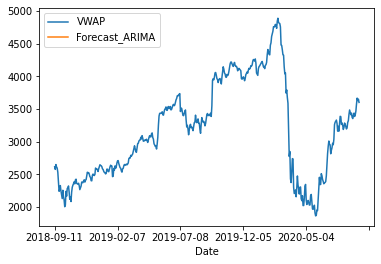

In [33]:
df_test[['VWAP', 'Forecast_ARIMA']].plot()
plt.show()